# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
import pandas as pd

In [20]:
# Your code here.
student_data = pd.DataFrame({'Student ID': [1, 2, 3, 4, 5,6,7,8,9,10],'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Student ID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


In [25]:
student_data = student_data.set_index('Student ID')

In [24]:
student_data

,Age,Tardies
Student ID,,
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0


Draw a dispersion diagram (scatter plot) for the data.

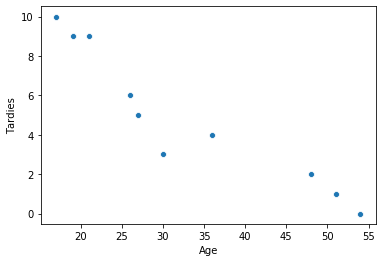

In [48]:
# Your code here.
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

sns.scatterplot(x='Age', y='Tardies', data=student_data)


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 

# We can suspect a linear negative relationship between the two variables, meaning with lower age, it is more likely, that students are late


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [41]:
# Your response here.
#correlation:
print(student_data.corr())

# The correlation coefficient tells us how strong of a 
# correlation there is between variables and in what direction (positive or negative).
# In this case the correlation coefficient is -0.939163, meaning the two variables Age and Tardies are almost
# perfectly (-1) negative correlated, so with increasing Age, Tardies are decreasing.

#covariance:
print(student_data.cov())

# Covariance does not say anything about the strength of the relationship of two variables, 
# but only if they are moving in the same direction. When the covariance is negative it means that larger values of one 
# variable correspond to smaller values of another variable.
# Here, our variables have a negative covariance, meaning that with higher age, Tardies will be smaller.

              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000
                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [45]:
from scipy import stats

In [46]:
# Your response here.

Y=student_data['Tardies']
X=student_data['Age']

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print(stats.linregress(X, Y))

# We are uilding a linear regression as we can suspect a negative linear relationship between 
# the variables after having plotted the scatterplot and after looking at correlation coefficient and covariance.


LinregressResult(slope=-0.2428207709159808, intercept=12.888803363135768, rvalue=-0.9391626886887121, pvalue=5.56665383455343e-05, stderr=0.03139728816158607)


Plot your regression model on your scatter plot.

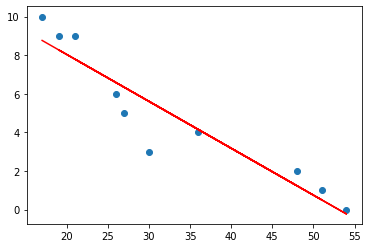

In [49]:
# Your code here.
plt.scatter(X,Y)
plt.plot(X, slope*X+intercept, color='red')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [51]:
# Your response here. 

r_value**2

# Looking at r squared we can conclude that approx. 88% of the movements of the Tardies can be explained by Age.


0.8820265558250108

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [53]:
# Import any libraries you may need & the data
df_vehicles = pd.read_csv('vehicles.csv')
df_vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [70]:
df_vehicles_filtered = df_vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']]
df_vehicles_filtered.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [76]:
# Your response here. 
df_vehicles_filtered.corr()

# Fuel Barrels/Year is highly positively correlated with CO2 Emission, meaning with increasing 
# Fuel Barrels/Year, also the CO2 Emission will increase. But also Combined MPG and Fuel Cost/Year 
# show a strong correlation with our dependent variable.
# The Year does not seem to add much value in this analysis.

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

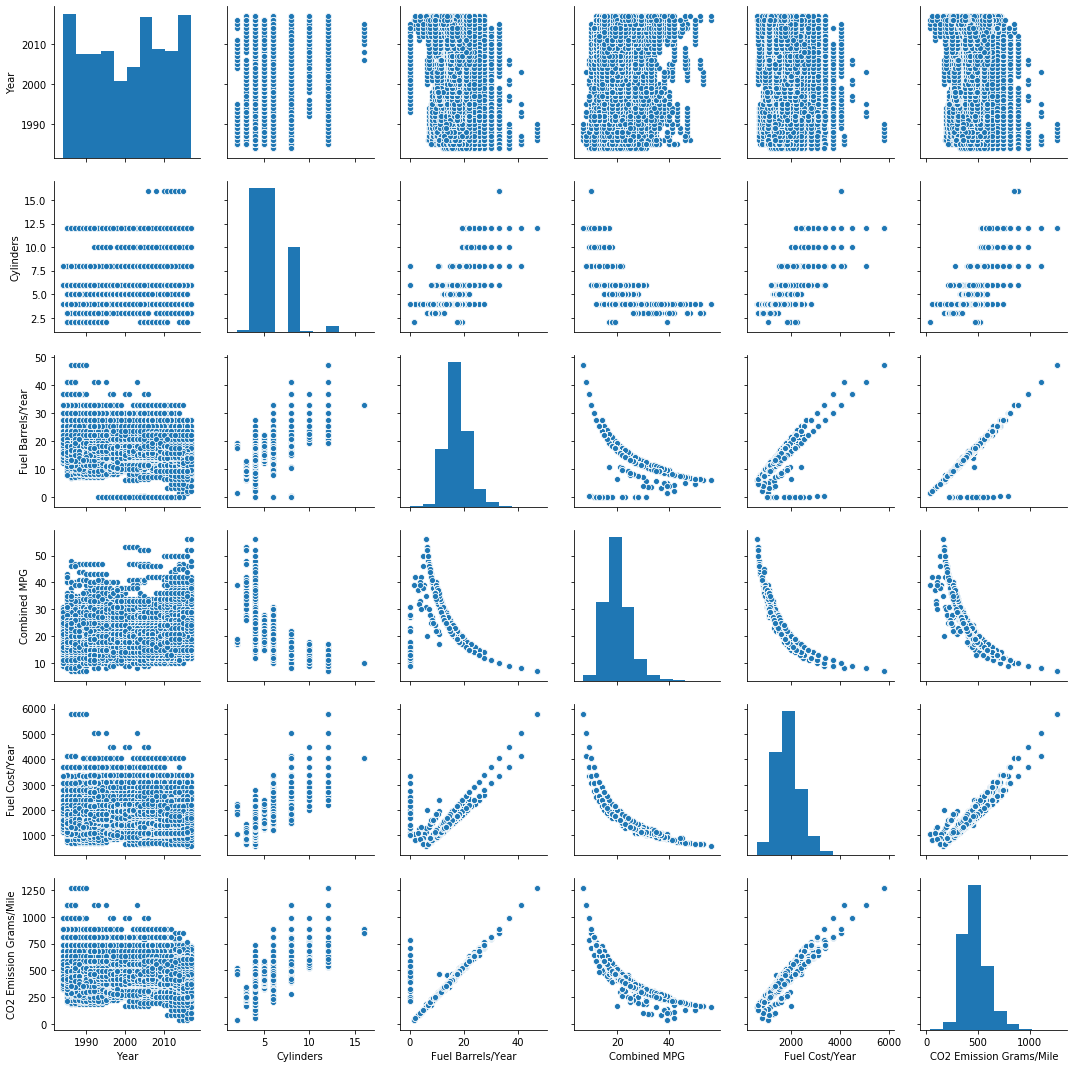

In [89]:
sns.pairplot(df_vehicles_filtered)

In [94]:
# Your response here. 

# After also looking at the pairplots, the best option would be to use a Multiple Linear Regression and include 
# Fuel Barrels/Year','Combined MPG','Fuel Cost/Year as the independent variables. 
# Since this is not possible using the stats.linregress I will just choose to do a simple linear regression 
# with just the Fuel Barrels/Year variable, as this variable shows the greatest correlation.

Y1=df_vehicles_filtered['CO2 Emission Grams/Mile']
X1=df_vehicles_filtered['Fuel Barrels/Year']

slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(X1, Y1)


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [95]:
# Your response here. 
print(stats.linregress(X1, Y1))

LinregressResult(slope=26.283625397470274, intercept=12.486520830757001, rvalue=0.9861886621428732, pvalue=0.0, stderr=0.023281123789227146)


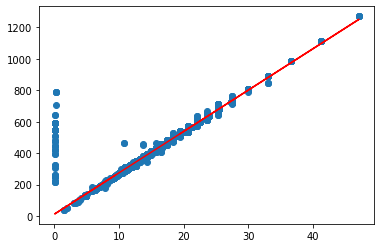

In [96]:
plt.scatter(X1,Y1)
plt.plot(X1, slope1*X1+intercept1, color='red')
plt.show()

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [97]:
# Your code here.

df_party = pd.DataFrame({'X': [1, 3, 4, 6, 8,9,11,14],'Y': [1,2,4,4,5,7,8,13]})
df_party

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

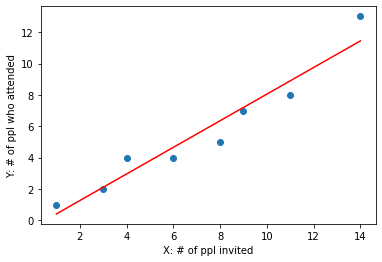

In [108]:
# Your code here.
Y2=df_party['Y']
X2=df_party['X']

slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(X2, Y2)

plt.scatter(X2,Y2)
plt.plot(X2, slope2*X2+intercept2, color='red')
plt.xlabel('X: # of ppl invited')
plt.ylabel('Y: # of ppl who attended')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [106]:
# Your response here. 

# The two variables seem to be positively correlated, i.e. the more people are invited, the more attend. 

print(stats.linregress(X2, Y2))

LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090686, stderr=0.09380896778286217)


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [111]:
# Your response here. 
# Actually I do not think there are any problematic points but for this exercise I will remove point (14/13) 
# as it is furthest away from the fitted line.

df_party_new = df_party[df_party['X'] < 14]
df_party_new

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


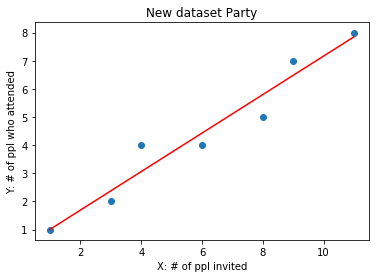

LinregressResult(slope=0.6842105263157895, intercept=0.32330827067669166, rvalue=0.971278116825086, pvalue=0.0002644056885656864, stderr=0.07496206665031292)


In [114]:
Y3=df_party_new['Y']
X3=df_party_new['X']

slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(X3, Y3)

plt.scatter(X3,Y3)
plt.plot(X3, slope3*X3+intercept3, color='red')
plt.title ('New dataset Party')
plt.xlabel('X: # of ppl invited')
plt.ylabel('Y: # of ppl who attended')
plt.show()

print(stats.linregress(X3, Y3))

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 

# The model has a better fit now after removing the outlier (e.g. r value is higher, standard error lower)